In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#To Read the csv file

df=pd.read_csv("retail_sales_dataset.csv")

In [3]:
#To view the first 5 values in the  table

df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
#to view the shape of the table

df.shape

(1000, 9)

There are 1000 rows and 9 columns in the table

In [5]:
#to view the overview of the table

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


From the above info it shows that there are 5 integer and 4 object datatypes

In [6]:
#to convert date column to date format
df["Date"]=pd.to_datetime(df["Date"])

In [7]:
#checking the data type after converting
df.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

In [8]:
#To view any duplicated in the table 
df.duplicated().sum()

0

There is no duplicates in the table

In [9]:
#To view the null values in each column
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

From the above it shows that there are no null values in each columns

In [10]:
#To view the discriptive statistics of the data
df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


The above discriptive statistics displays only the summary of numerical data 

In [11]:
#To view the summary of the catagorical data
df.describe(include='object')

,Customer ID,Gender,Product Category
count,1000,1000,1000
unique,1000,2,3
top,CUST001,Female,Clothing
freq,1,510,351


In [12]:
#to remove Transaction ID column
df.drop(columns=['Transaction ID'], inplace=True)

In [13]:
#to remove Transaction ID column
df.drop(columns=['Customer ID'], inplace=True)

In [14]:
df.head()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,2023-11-24,Male,34,Beauty,3,50,150
1,2023-02-27,Female,26,Clothing,2,500,1000
2,2023-01-13,Male,50,Electronics,1,30,30
3,2023-05-21,Male,37,Clothing,1,500,500
4,2023-05-06,Male,30,Beauty,2,50,100


<Axes: >

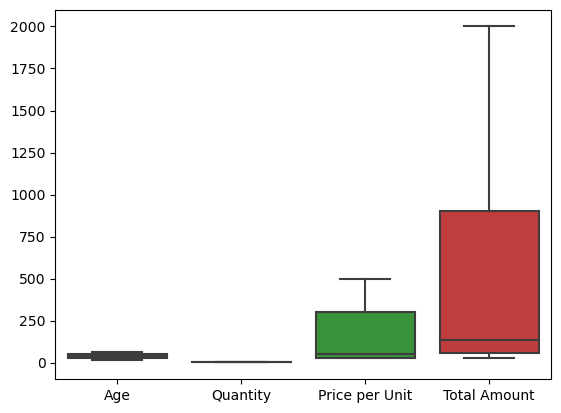

In [15]:
#To plot the boxplot for numeric collumns

sns.boxplot(df.select_dtypes(include='number'))

The above bax plots represents the distribution of a continuous variable through five summary statistics(Min,quartile(Q1,Q2,Q3),Max) of all numeric data

let's see the the box plot individually

<Axes: >

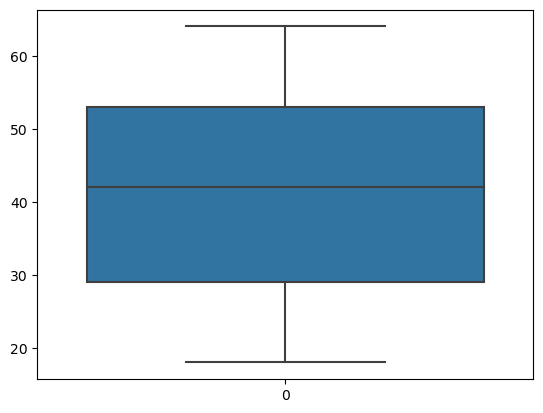

In [16]:
sns.boxplot(df["Age"])

<Axes: >

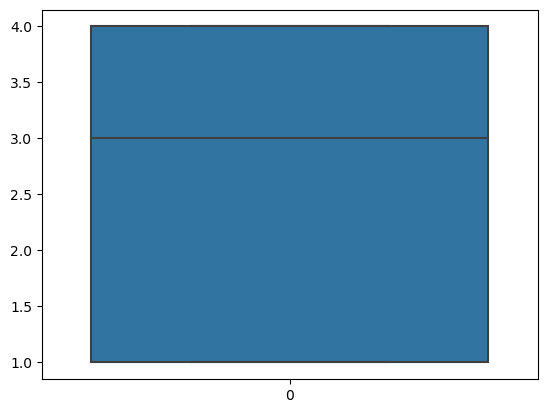

In [17]:
sns.boxplot(df["Quantity"])

<Axes: >

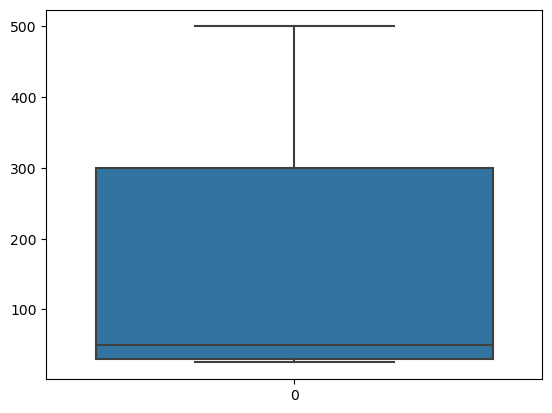

In [18]:
sns.boxplot(df["Price per Unit"])

<Axes: >

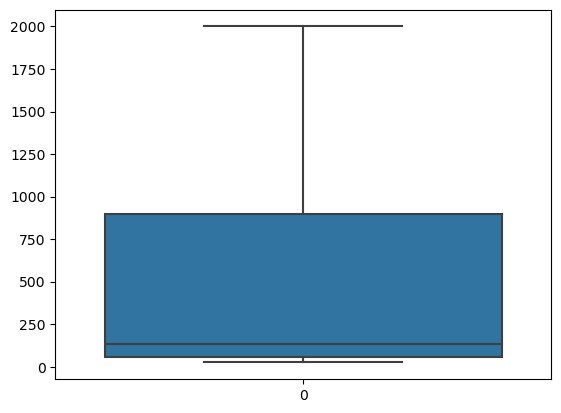

In [19]:
sns.boxplot(df["Total Amount"])

From the above bar plots, we can see there is  no outliers in  each numeric columns

In [20]:
#To find the correlation matrix
corr=df.corr(numeric_only=True)
corr

,Age,Quantity,Price per Unit,Total Amount
Age,1.000000,-0.023737,-0.038423,-0.060568
Quantity,-0.023737,1.000000,0.017501,0.373707
Price per Unit,-0.038423,0.017501,1.000000,0.851925
Total Amount,-0.060568,0.373707,0.851925,1.000000


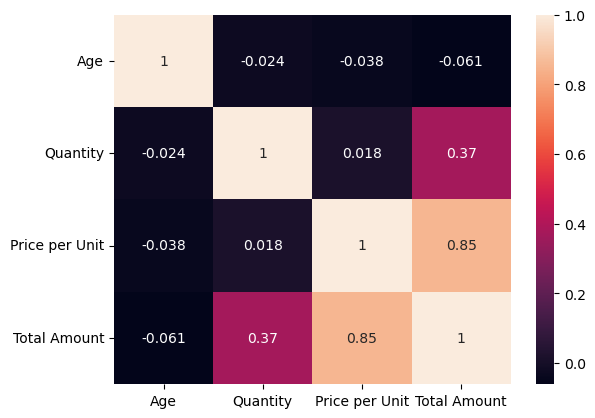

In [21]:
#To plot the heatmap
sns.heatmap(corr,annot=True)
plt.show()

<Axes: xlabel='Quantity', ylabel='Total Amount'>

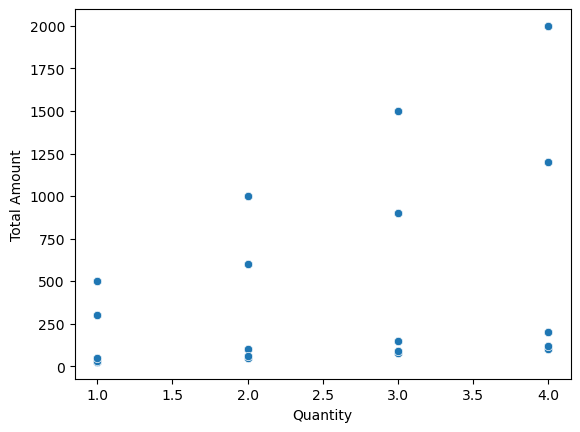

In [22]:
#To plot scatter plot for view of relation between Quantity and Total Amount
sns.scatterplot(x=df["Quantity"],y=df["Total Amount"],data=df)

<Axes: xlabel='Quantity', ylabel='Price per Unit'>

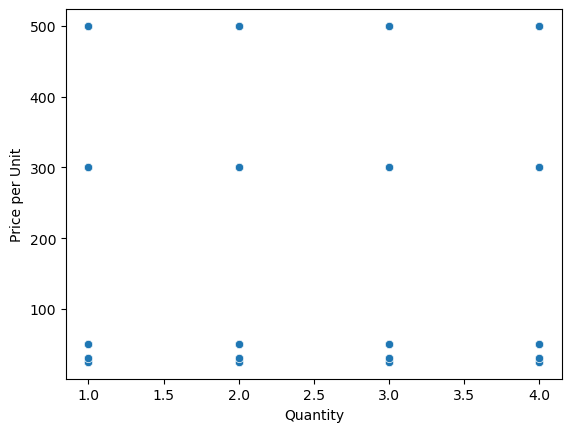

In [23]:
#To plot scatter plot for view of relation between Quantity and Price per Unit
sns.scatterplot(x=df["Quantity"],y=df["Price per Unit"],data=df)

<Axes: xlabel='Price per Unit', ylabel='Total Amount'>

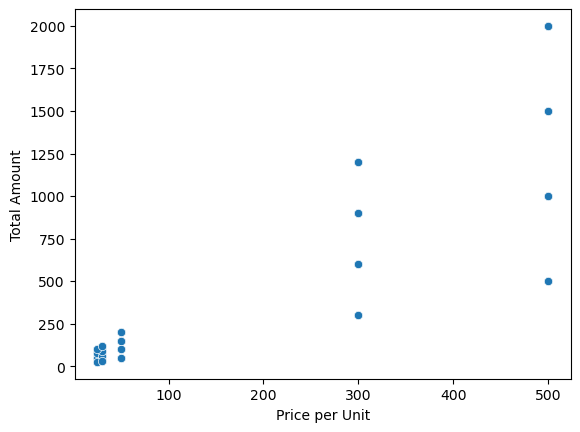

In [24]:
#To plot scatter plot for view of relation between Price per Unit and Total Amount
sns.scatterplot(x=df["Price per Unit"],y=df["Total Amount"],data=df)

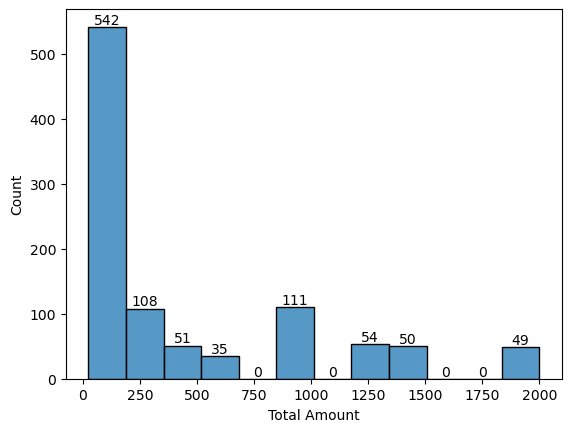

In [25]:
#To plot Histogram for Total Amount for viewing thw distribution of data
ax=sns.histplot(data=df,x=df["Total Amount"])
for i in ax.containers:
    ax.bar_label(i,)

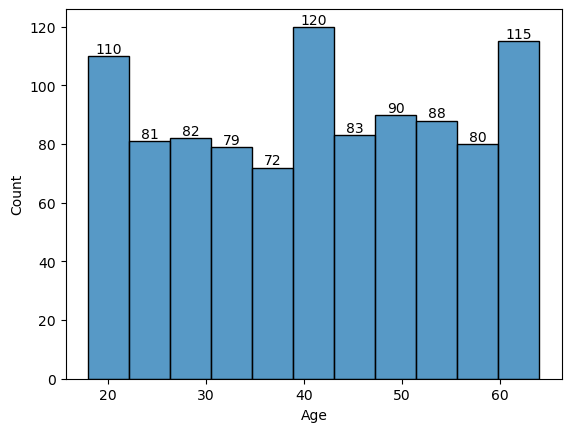

In [26]:
#To plot Histogram for Age for viewing thw distribution of data
bx=sns.histplot(data=df,x=df["Age"])
for i in bx.containers:
    bx.bar_label(i,)

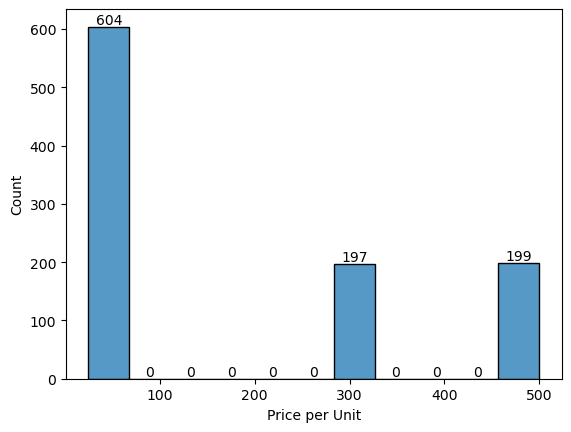

In [27]:
#To plot Histogram for Price per Unit for viewing thw distribution of data
cx=sns.histplot(data=df,x=df["Price per Unit"])
for i in cx.containers:
    cx.bar_label(i,)

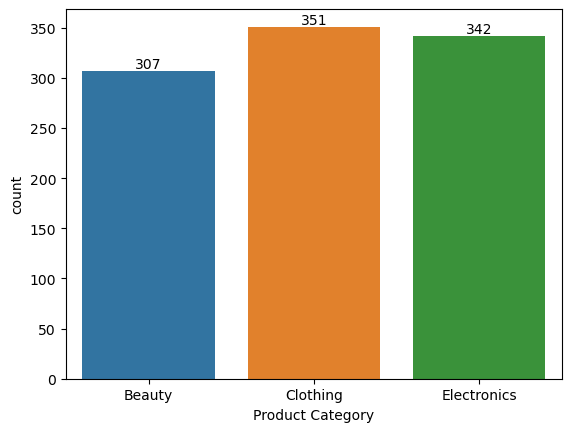

In [28]:
dx=sns.countplot(x="Product Category",data=df)
for i in dx.containers:
    dx.bar_label(i,)

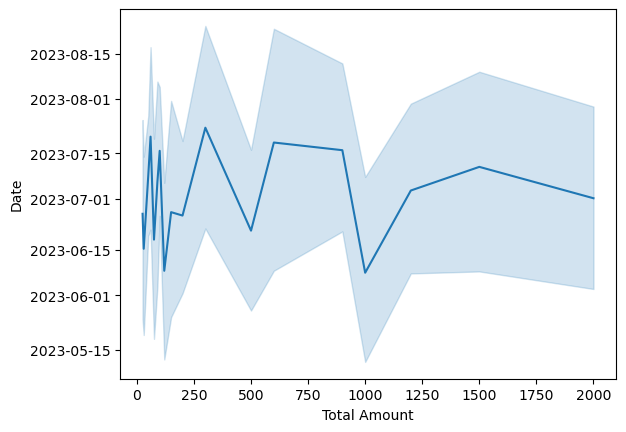

In [29]:
sns.lineplot(x=df["Total Amount"], y=df["Date"],data=df)
plt.show()

<Axes: ylabel='Total Amount'>

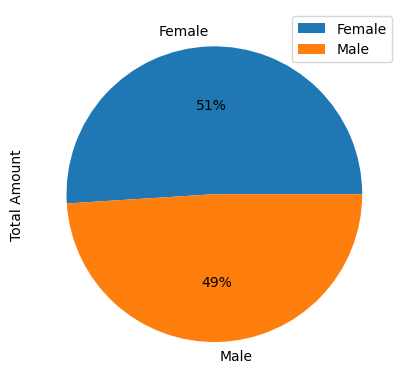

In [30]:
df.groupby(['Gender']).count().plot(kind='pie', y="Total Amount",autopct='%1.0f%%') 

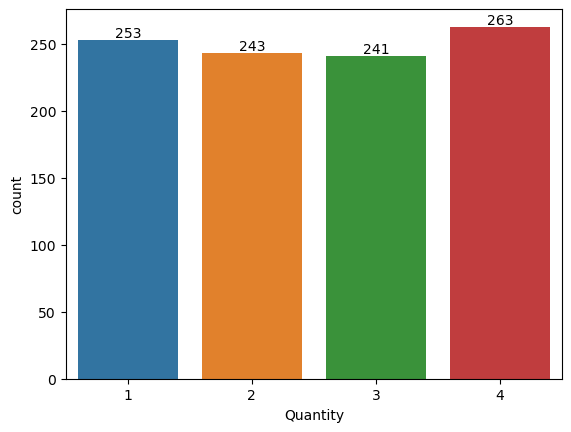

In [31]:
x=sns.countplot(x="Quantity",data=df)
for i in x.containers:
    x.bar_label(i,)

In [32]:
df['Total Amount'].skew()

1.3761282440171279

In [33]:
df['Age'].skew()

-0.04881245380328967

In [34]:
df['Price per Unit'].skew()

0.7363077780665441

SUMMARY:

1)From the box plot it describes that there is no outliers in all the numerical columns

2)From the Heat map it describes that,
-->The Age catagory has negative correlation on other columns (i.e) there are opposite relations between age and other columns
-->Quantity has Positive correlation on Total Amount column (i.e) there is a relationship between this two columns and also Quantity column has very less correlation with price per unit column (i.e) there is no relationship between the two columns
-->Price Per unit has Positive correlation on Total Amount

3)The Different Scatter plots discribes the relationsip clearly between the columns

4)The Total Amount Histogram reprents that,
-->Average Total Amount:456
-->The distribution of data is large in left of Average so it is positive skewness

5)The Age  Histogram reprents that,
-->Mean Age:41
-->The distribution of data is large in right of Average so it is Negative skewness

6)From the count plot,
-->It shows that all the product sales are high,among that clothing has the highest sales
-->It show that all the quantity are high,among that quantity 4 has the highest count

7)From the pie chart it describes that,the distribution is almost equal to both male and female